In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


In [4]:
(x_train, _), (x_test, _) = mnist.load_data()
# reshaping image
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [5]:
encoding_dim = 32
input_img = Input(shape=(784,))


In [6]:
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [7]:
# train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - loss: 0.3883 - val_loss: 0.1926
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.1822 - val_loss: 0.1554
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 0.1512 - val_loss: 0.1355
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.1326 - val_loss: 0.1202
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 0.1192 - val_loss: 0.1116
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1112 - val_loss: 0.1057
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1060 - val_loss: 0.1019
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.1022 - val_loss: 0.0989
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0994 - val_loss: 0.0968
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - loss: 0.0976 - val_loss: 0.0954
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 0.0965 - val_loss: 0.0945
Epoch 12/50
235/235 ━━━━━━━━━━

In [8]:
# testing
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


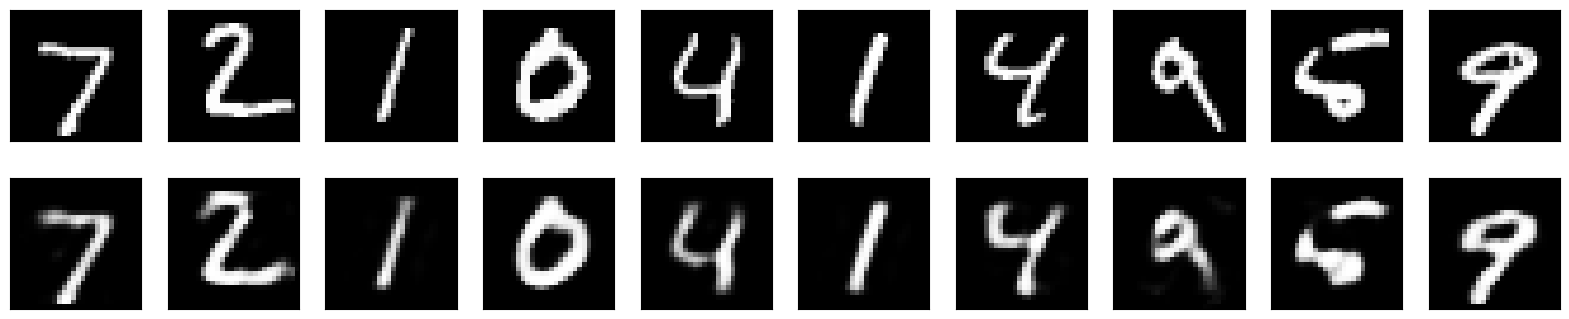

In [9]:
# output
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
